In [20]:
import pandas as pd

In [2]:
df = pd.read_csv("final_ka_final.csv")

In [24]:
data = pd.read_csv("processed1.csv")

In [42]:
data.dtypes

Unnamed: 0.2               int64
movie_id                   int64
actor_1_gender             int64
actor_2_gender             int64
actor_1_name              object
actor_2_name              object
director_gender            int64
director_name             object
Unnamed: 0.1               int64
Unnamed: 0                object
adult                       bool
budget                     int64
genres                    object
original_language         object
original_title            object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
title                     object
vote_average             float64
vote_count               float64
Label                   category
dtype: object

In [37]:
df.dtypes

Unnamed: 0.2               int64
movie_id                   int64
actor_1_gender             int64
actor_2_gender             int64
actor_1_name              object
actor_2_name              object
director_gender            int64
director_name             object
Unnamed: 0.1               int64
Unnamed: 0                object
adult                       bool
budget                     int64
genres                    object
original_language         object
original_title            object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
title                     object
vote_average             float64
vote_count               float64
Label                   category
dtype: object

In [39]:
small = df[['movie_id', 'Label']].copy()

In [43]:
smallover = data[['movie_id','overview']].copy()

In [45]:
smalloverer

,movie_id,overview
0,862,lead woody andy toy live happily room andy bir...
1,8844,sibling judy peter discover enchant board game...
2,15602,family wed reignites ancient feud next door ne...
3,31357,cheat mistreat stepped woman hold breath wait ...
4,11862,george bank recover daughter wed receives news...
...,...,...
40392,289923,film archivist revisit story rustin parr hermi...
40393,222848,year ad world dangerous woman banish remote as...
40394,30840,yet another version classic epic enough variat...
40395,67758,one hit go wrong professional assassin end sui...


In [46]:
smallmo = pd.merge(small, smallover, on="movie_id")

In [47]:
smallmo


,movie_id,Label,overview
0,862,Superhit,lead woody andy toy live happily room andy bir...
1,8844,Superhit,sibling judy peter discover enchant board game...
2,31357,Above Average,cheat mistreat stepped woman hold breath wait ...
3,11862,Above Average,george bank recover daughter wed receives news...
4,949,Hit,obsessive master thief neil mccauley lead top ...
...,...,...,...
7419,264269,Disaster,sveta maxim happy newlywed move hew apartment ...
7420,240789,Disaster,film base real event take place samara know st...
7421,62757,Flop,sea august interesting simple people tan swim ...
7422,63281,Flop,у девушки даши приехавшей с подругой покорять ...


In [48]:
smallmo.to_csv('classified_overview.csv')

In [5]:
df['revenue'].describe

<bound method NDFrame.describe of 0       373554033.0
1       262797249.0
2        81452156.0
3        76578911.0
4       187436818.0
           ...     
7299       320395.0
7300        50656.0
7301      1328612.0
7302      1268793.0
7303      1413000.0
Name: revenue, Length: 7304, dtype: float64>

In [31]:
df['Label'] = pd.cut(x=df['revenue'],
                     bins=[0,1000000, 10000000, 30000000, 50000000,100000000,200000000,500000000,1000000000,2000000000,20000000000],
                     labels=['Disaster', 'Flop', 'Below Average','Average','Above Average','Hit','Superhit','Blockbuster','Mega Blockbuster','All-time-blockbuster'])
  

In [32]:
df['Label']

0            Superhit
1            Superhit
2       Above Average
3       Above Average
4                 Hit
            ...      
7299         Disaster
7300         Disaster
7301             Flop
7302             Flop
7303             Flop
Name: Label, Length: 7304, dtype: category
Categories (10, object): ['Disaster' < 'Flop' < 'Below Average' < 'Average' ... 'Superhit' < 'Blockbuster' < 'Mega Blockbuster' < 'All-time-blockbuster']

In [35]:
df['overview'][3]

"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own."

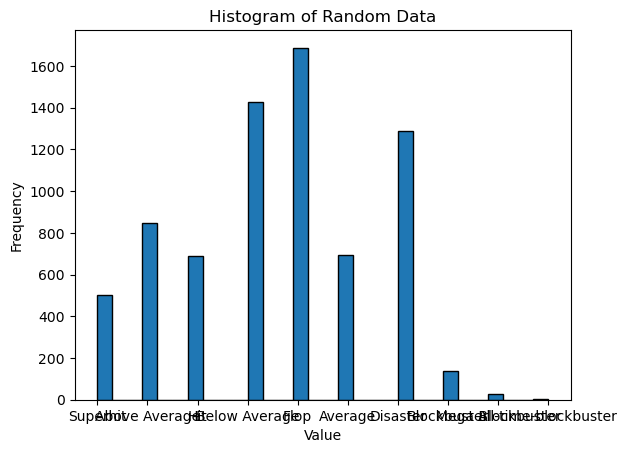

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
np.random.seed(0)
data = df['Label']

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')
plt.show()

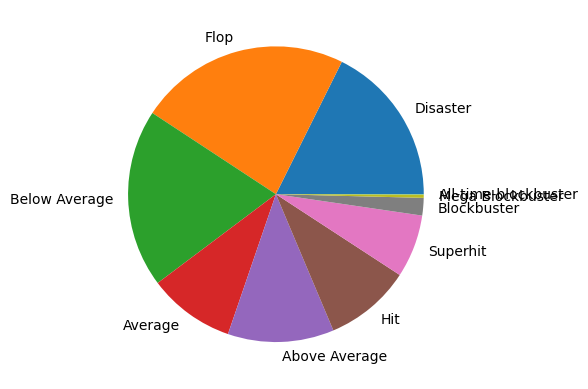

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the dataframe by genre
genre_groups = df.groupby('Label')

# Sum the values in each group
genre_counts = genre_groups['Label'].count()

# Plot the pie chart
plt.pie(genre_counts, labels=genre_groups.groups.keys())
plt.show()
